# Assignment 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## Question 1

Solving the wave equation $$ u_{xx} = u_{tt}$$ in an infinitely long uniform cross sectioned string under tension. \
The displacement of string at is $$ y(x,t = 0) = 0.1\text{cos}\left( 5\pi x \right)$$ for &nbsp;$ -0.1 \leq x \leq 0.1$&ensp;and zero outside. \
The string is let go with zero velocity. \
Since the given string is long the domain considered is a bit longer than &nbsp;$\left[-0.1,0.1\right]$&nbsp; say from &nbsp;$\left[-0.2,1\right]$&nbsp; so that **dirichlet boundary conditions** can be assumed. \
\
Using the **CTCS** scheme $\implies$ \
\
The stencil obtained at point &nbsp;$ (i,n)$&nbsp;is $$ u_i^{n+1} = C^2\left( u_{i+1}^{n} + u_{i-1}^n \right)+ 2\left( 1 - C^2 \right)u_i^n - u_i^{n-1}$$ \
The stability condition is $$ C^2 \leq 1$$

In [2]:
def boundary_conditions_1(u, x):
    '''
    Inputs :-

        u :: Solution
        x :: Space domain
    '''
    
    for i in range(len(x)):
        if (-0.1 <= x[i] <= 0.1):
            u[0, i] = 0.1 * np.cos(5 * np.pi * x[i])
        else :
            u[0, i] = 0

    u[:, 0] = 0
    u[:, -1] = 0

    return u

In [3]:
dx_1 = 0.01
dt_1 = 0.005

a_1 = 1
C_1 = (a_1 * dt_1)/dx_1

x_start_1 = -0.75
x_end_1 = 0.75

t_start_1 = 0
t_end_1 = 0.4

x_1 = np.arange(x_start_1, x_end_1 + dx_1, dx_1)
t_1 = np.arange(t_start_1, t_end_1 + dt_1, dt_1)

nx_1 = len(x_1)
nt_1 = len(t_1)

In [4]:
u_1 = np.zeros((nt_1, nx_1))
u_1 = boundary_conditions_1(u_1, x_1)

In [5]:
for i in range(nt_1 - 1):
    for j in range(1, nx_1 - 1):
        if (i == 0):
            u_1[1, j] = (C_1**2/2)*(u_1[0, j + 1] + u_1[0, j - 1]) + (1 - C_1**2)*u_1[0, j]
        else :
            u_1[i + 1, j] = (C_1**2)*(u_1[i, j + 1] + u_1[i, j - 1]) + 2*(1 - C_1**2)*u_1[i, j] - u_1[i - 1, j]

**Stability** \
$$ C = \frac{a  \triangle t}{\triangle x} = \frac{1 \times 0.005}{0.01} = 0.5$$ \
$\implies$ $$ C^2 = 0.5^2 = 0.25 \leq 1$$ \
Hence we can expect a stable solution.

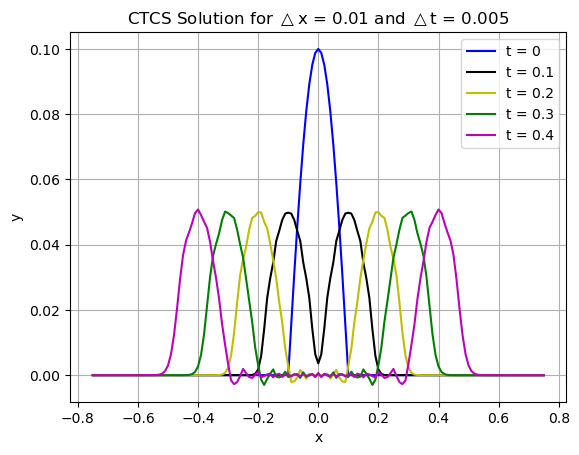

In [6]:
plt.title(rf"CTCS Solution for $\triangle$x = {dx_1} and $\triangle$t = {dt_1}")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_1, u_1[0,:], c = 'b', label = 't = 0')
plt.plot(x_1, u_1[20,:], c = 'k', label = 't = 0.1')
plt.plot(x_1, u_1[40,:], c = 'y', label = 't = 0.2')
plt.plot(x_1, u_1[60,:], c = 'g', label = 't = 0.3')
plt.plot(x_1, u_1[80,:], c = 'm', label = 't = 0.4')
plt.legend()
plt.grid()
plt.show()

## Question 2

Solving the wave equation $$ \frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}$$ where &nbsp;$c = 1$ \
The conditions given are : 
1) Fixed at &nbsp;$x = 0$.
2) Free at &nbsp;$x = 1$&nbsp;$\implies$&nbsp;$\frac{\partial u}{\partial x} = 0$.

Since the initial conditions aren't given, assuming the initial conditions as follows &nbsp;$\implies$ 
1) The value of u at &ensp;$t = 0$&ensp; is &ensp;$u(x,0) = sin \left( \frac{\pi x}{2} \right)$.
2) The wave is initially at rest &nbsp;$\implies \frac{\partial u}{\partial t} = 0$&ensp;at&ensp;$t = 0$. 

Using the **CTCS** scheme $\implies$ \
\
The stencil obtained at point &nbsp;$ (i,n)$&nbsp;is $$ u_i^{n+1} = C^2\left( u_{i+1}^{n} + u_{i-1}^n \right)+ 2\left( 1 - C^2 \right)u_i^n - u_i^{n-1}$$ \
The stability condition is $$ C^2 \leq 1$$

In [7]:
def boundary_conditions_2(u, x):
    '''
    Inputs :-

      u :: Solution Matrix
      x :: Space Domain
    '''
    
    u[:,0] = 0
    u[0,:] = np.sin((np.pi * x/2))

    return u

In [8]:
dx_2 = 0.01
dt_2 = 0.005

a_2 = 1
C_2 = (a_1 * dt_1)/dx_1

x_start_2 = 0
x_end_2 = 1

t_start_2 = 0
t_end_2 = 10

x_2 = np.arange(x_start_2, x_end_2 + dx_2, dx_2)
t_2 = np.arange(t_start_2, t_end_2 + dt_2, dt_2)

nx_2 = len(x_2)
nt_2 = len(t_2)

In [9]:
u_2 = np.zeros((nt_2,nx_2))
u_2 = boundary_conditions_2(u_2, x_2)

In [10]:
for i in range(nt_2 - 1):
    for j in range(1, nx_2):
        if (i == 0 and (j != nx_2 - 1)):
            u_2[1, j] = (C_2**2/2)*(u_2[0, j + 1] + u_2[0, j - 1]) + (1 - C_2**2)*u_2[0, j]
        elif (i == 0 and j == nx_2 - 1):
            u_2[1, j] = (C_2**2)*(u_2[0, j - 1]) + (1 - C_2**2)*u_2[0, j]
        elif (i != 0 and (j != nx_2 - 1)) :
            u_2[i + 1, j] = (C_2**2)*(u_2[i, j + 1] + u_2[i, j - 1]) + 2*(1 - C_2**2)*u_2[i, j] - u_2[i - 1, j]
        else :
            u_2[i + 1, j] = 2*(C_2**2)*(u_2[i, j - 1]) + 2*(1 - C_2**2)*u_2[i, j] - u_2[i - 1, j]
            

**Stability** \
$$ C = \frac{a  \triangle t}{\triangle x} = \frac{1 \times 0.005}{0.01} = 0.5$$ \
$\implies$ $$ C^2 = 0.5^2 = 0.25 \leq 1$$ \
Hence we can expect a stable solution.

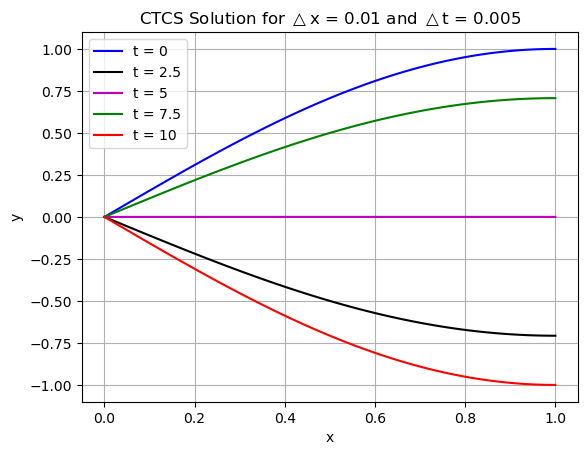

In [11]:
plt.title(rf"CTCS Solution for $\triangle$x = {dx_2} and $\triangle$t = {dt_2}")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_2, u_2[0,:], c = 'b', label = 't = 0')
plt.plot(x_2, u_2[500,:], c = 'k', label = 't = 2.5')
plt.plot(x_2, u_2[1000,:], c = 'm', label = 't = 5')
plt.plot(x_2, u_2[1500,:], c = 'g', label = 't = 7.5')
plt.plot(x_2, u_2[2000,:], c = 'r', label = 't = 10')
plt.legend()
plt.grid()
plt.show()

## Question 3

Solving the wave equation with damping given by $$ u_{xx} = u_{tt} + \gamma u_t$$ in the region &nbsp;$0 \leq x \leq 1$&nbsp; and &nbsp;$\gamma$&nbsp; is the **damping** parameter. \
\
The conditions given are : 
1) Speed of wave = 1.
2) Motion is performed from rest &nbsp;$\implies$&nbsp; initial velocity = 0.
3) Initial Displacement : &nbsp;$u(x,0) = 0.02x(1 - x)$.

**Note**: Damping parameter varies between 0 and 0.5. \
\
Using **CTCS** scheme,the discretised stencil is obtained as $$ u_i^{n+1} = \frac{u_{i+1}^n + 2 \left( C^2 - 1 \right)u_i^n + u_{i-1}^n - \left ( C^2 - \gamma \frac{(\triangle x)^2}{2 \triangle t} \right) u_i^{n-1}}{\left( C^2 + \gamma \frac{(\triangle x)^2}{2\triangle t} \right)}$$ \
\
The stability condition for this scheme is $$C^2 \leq 1$$

In [12]:
def boundary_conditions_2(u, x):
    '''
    Inputs :-

        u :: Solution Matrix
        x :: Space Domain
    '''

    u[0,:] = 0.02 * x * (1 - x)
    u[:,0] = 0                            # Assuming Dirichlet conditions.
    u[:,-1] = 0
    
    return u

In [13]:
dx_2 = 0.01
dt_2 = 0.005

a_2 = 1
C_2 = (a_2 * dx_2)/(dt_2)
gamma = 0.2

k = (gamma * (dx_2)**2) / (2*dt_2)

x_start_2 = 0
x_end_2 = 1

t_start_2 = 0
t_end_2 = 0.4

x_2 = np.arange(x_start_2, x_end_2 + dx_2, dx_2)
t_2 = np.arange(t_start_2, t_end_2 + dt_2, dt_2)

nx_2 = len(x_2)
nt_2 = len(t_2)

In [14]:
u_2 = np.zeros((nt_2, nx_2))
u_2 = boundary_conditions_2(u_2, x_2)

In [15]:
for i in range(nt_2 - 1):
    for j in range(1, nx_2 - 1):
        if (i == 0):
            u_2[i + 1, j] = (u_2[i, j + 1] + 2*(C_2**2 - 1)*u_2[i, j] + u_2[i, j - 1]) / (2 * C_2**2)
        else :
            u_2[i + 1, j] = (u_2[i, j + 1] + 2*(C_2**2 - 1)*u_2[i, j] + u_2[i, j - 1] - (C_2**2 - k)*u_2[i - 1, j]) / (C_2**2 + k)

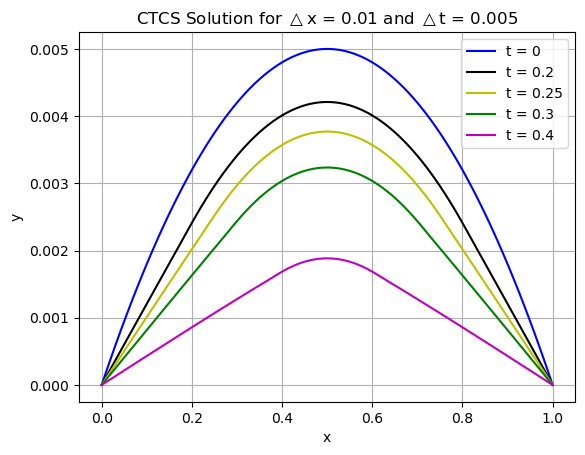

In [16]:
plt.title(rf"CTCS Solution for $\triangle$x = {dx_2} and $\triangle$t = {dt_2}")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_2, u_2[0,:], c = 'b', label = 't = 0')
plt.plot(x_2, u_2[40,:], c = 'k', label = 't = 0.2')
plt.plot(x_2, u_2[50,:], c = 'y', label = 't = 0.25')
plt.plot(x_2, u_2[60,:], c = 'g', label = 't = 0.3')
plt.plot(x_2, u_2[80,:], c = 'm', label = 't = 0.4')
plt.legend()
plt.grid()
plt.show()

## Question 4

Solving the Poisson's equation $$ \frac{1}{r} \frac{\partial}{\partial r} \left ( r \frac{\partial u}{\partial r} \right) + \frac{1}{r^2} \frac{\partial^2 u}{\partial \theta^2} = 0.5$$ \
Breaking down this gives us the equation &nbsp;$\implies$ $$ \frac{\partial^2u}{\partial r^2} + \frac{1}{r} \frac{\partial u}{\partial r} + \frac{1}{r^2} \frac{\partial^2 u}{\partial \theta^2} = 0.5$$ \
The discretized stencil is <br>
$$ \left[ 2r_{i,j}^2 (\triangle \theta)^2 + r_{i,j} (\triangle r) (\triangle \theta)^2 \right]u_{i+1,j} - 4 \left[ r_{i,j}^2 (\triangle \theta)^2 + (\triangle r)^2 \right]u_{i,j} + \left[ 2r_{i,j}^2 (\triangle \theta)^2 - r_{i,j} (\triangle r) (\triangle \theta)^2 \right]u_{i-1,j} + 2(\triangle r)^2 \left[ u_{i,j+1} + u_{i,j-1} \right] = r_{i,j}^2 (\triangle \theta)^2 (\triangle r)^2$$ \
<br> 
For solving this converting the 2D space domain into 1D matrix by the relation &ensp;$(i,j) = i \times N_{\theta} + j$.

In [17]:
dr_3 = 0.02
dtheta_3 = 0.02 * np.pi

r_start_3 = 0
r_end_3 = 1

theta_start_3 = 0
theta_end_3 = 2 * np.pi

r_3 = np.arange(r_start_3, r_end_3 + dr_3, dr_3)
theta_3 = np.arange(theta_start_3, theta_end_3 + dtheta_3, dtheta_3)

nr_3 = len(r_3)
ntheta_3 = len(theta_3)
n = (nr_3 * ntheta_3)

In [18]:
A = np.zeros((n,n))
b = np.zeros((n,1))

dr_sq = dr_3 ** 2
dtheta_sq = dtheta_3 ** 2

In [19]:
def find_idx(i,j):
    '''
    Function to convert 2D matrix into a 1D matrix.
    '''
    j = j % ntheta_3
    return (i * ntheta_3) + j

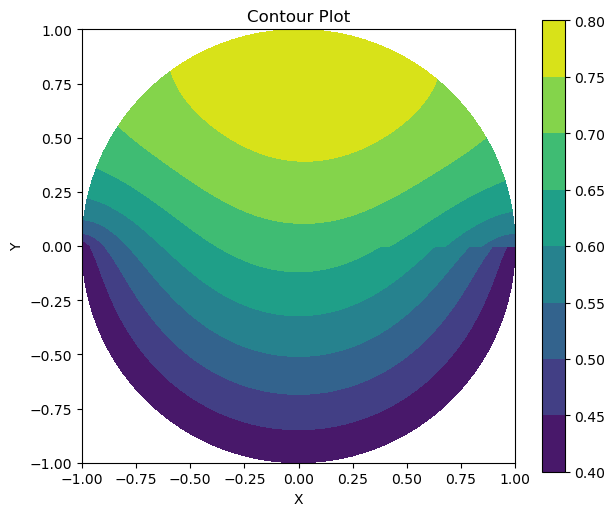

In [20]:
for i in range(1, nr_3 - 1):
    for j in range(ntheta_3):
        present = find_idx(i, j)
        j_plus = (j + 1) % ntheta_3
        j_minus = (j - 1) % ntheta_3
        
        r_ij = r_3[i]
        
        coeff_plus_r = (r_ij + 0.5 * dr_3) / (r_ij * dr_sq)
        coeff_minus_r = (r_ij - 0.5 * dr_3) / (r_ij * dr_sq)
        coeff_theta = 1 / (r_ij**2 * dtheta_sq)
        coeff_center = -2 * (1/dr_sq + 1/(r_ij**2 * dtheta_sq))
        
        A[present, find_idx(i+1, j)] = coeff_plus_r
        A[present, find_idx(i-1, j)] = coeff_minus_r
        A[present, find_idx(i, j_plus)] = coeff_theta
        A[present, find_idx(i, j_minus)] = coeff_theta
        A[present, present] = coeff_center
        
        b[present, 0] = -0.5  

i = 0
for j in range(ntheta_3):
    idx = find_idx(i, j)
    
    A[idx, :] = 0 
    
    for j_neighbor in range(ntheta_3):
        A[idx, find_idx(1, j_neighbor)] = 1.0 / ntheta_3
    
    A[idx, idx] = -1
    b[idx, 0] = 0  

i = nr_3 - 1
for j in range(ntheta_3):
    idx = find_idx(i, j)
    A[idx, :] = 0  
    
    if 0 <= theta_3[j] <= np.pi:  
        A[idx, find_idx(i, j)] = 1 + 0.1 * dr_3
        A[idx, find_idx(i-1, j)] = -1
        b[idx, 0] = 0.1 * 0.4 * dr_3
    else:  
        A[idx, idx] = 1
        b[idx, 0] = 0.4

u_flat = np.linalg.solve(A, b)

u = u_flat.reshape((nr_3, ntheta_3))

r_grid, theta_grid = np.meshgrid(r_3, theta_3, indexing='ij')
x = r_grid * np.cos(theta_grid)
y = r_grid * np.sin(theta_grid)

fig = plt.figure(figsize=(12, 10))

ax2 = fig.add_subplot(222)
contour = ax2.contourf(x, y, u, cmap=cm.viridis)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Contour Plot')
ax2.set_aspect('equal')
fig.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()